In [1]:
!pwd

/home/jakob/htw/imi-master-thesis/notebooks/experiments/ChenConvolutionalNeuralNetworks2017


In [69]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../src/')

%matplotlib inline
import matplotlib.pyplot as plt

import json
import os
from pathlib import Path
import random

from models.chen2017.transforms import *
from models.chen2017.preprocess import get_central_labels
import datasets.divahisdb as diva
import experiment.data as exd
import datasets.tiles as tile

from PIL import Image
import numpy as np

env = exp.Environment()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
dataset = diva.HisDBDataset(env.dataset(exp.Datasets.diva.value), gt=True)

In [107]:
scaler = Scale()
get_tiles = SegmentTiling()
get_gt = TileGroundTruth()

In [108]:

idx = 0
page, gt = dataset[idx]
crop = tile.RandCrop(500, random.Random('slic'))
crop_gt = tile.RandCrop(500, random.Random('slic'))

scaled = scaler(page)
scaled_gt = np.array(Image.fromarray(gt).resize((scaled.width, scaled.height)))
slic = SLIC(n_segments=3000, compactness=10)

scaled = crop(scaled)
scaled_gt = np.array(crop_gt(Image.fromarray(scaled_gt)))


spixel = slic(scaled)
tiles, meta = get_tiles(np.array(scaled), spixel)
tiles_gt, _ = get_tiles(np.array(scaled_gt), spixel)



In [109]:
# Image.fromarray(diva.color_gt(scaled_gt))
# scaled
get_central_labels(scaled_gt, meta)

array([2, 2, 0, ..., 0, 0, 0], dtype=uint8)

In [123]:
meta

array([[  17,  305,   57],
       [  14,  350,   58],
       [  15,   44,   61],
       ...,
       [ 481,  445, 2702],
       [ 483,  474, 2703],
       [ 484,  392, 2705]], dtype=int32)

In [132]:
y = get_central_labels(scaled_gt, meta)
colored = np.zeros(spixel.shape,dtype=np.int)
for idx in range(len(y)):
    tile_id = spixel[meta[idx][0],meta[idx][1]]
    gt = y[idx]
    colored[np.where(spixel == tile_id)] = hisdb.LABEL_DICT[gt]

In [133]:
# np.unique(y, return_counts=True)
gt

0

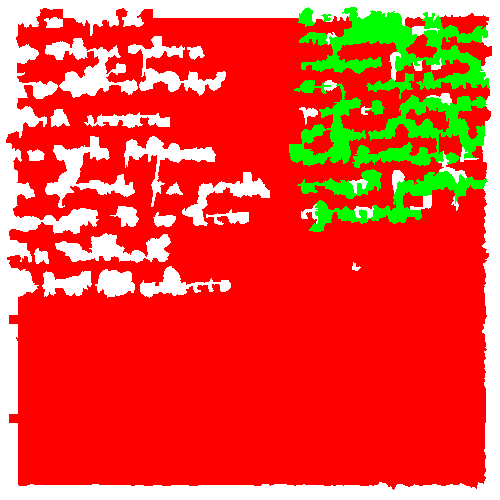

In [135]:
Image.fromarray(diva.color_gt(colored))

In [122]:
Image.fromarray(slic)

AttributeError: 'SLIC' object has no attribute '__array_interface__'

In [127]:
patches = tiles_gt
if len(patches.shape) > 3:
    n, height, width, channels = patches.shape
    big_img = np.zeros((n_images * height, n_images * width, channels), dtype=patches.dtype)
else:
    n, height, width, channels = *patches.shape, 1
    big_img = np.zeros((n_images * height, n_images * width), dtype=patches.dtype)
n_images = 16


for m in range(n_images):
    for n in range(n_images):
        idx = m * n_images + n
        if channels == 1:
            big_img[m*height: (m+1)*height, n*width:(n+1)*width] = patches[idx]
        else:
            big_img[m*height: (m+1)*height, n*width:(n+1)*width,:] = patches[idx]

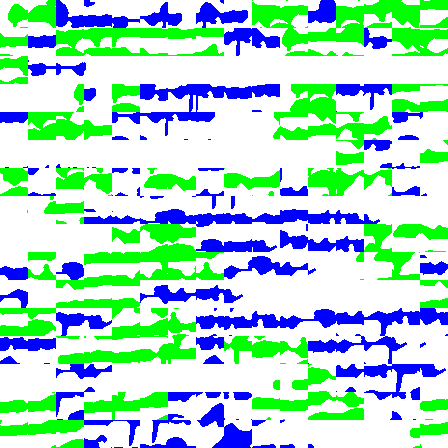

In [128]:

Image.fromarray(diva.color_gt(big_img))

In [94]:
patches.shape


(2725, 28, 28)